In [19]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

# Custom imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils

# Lauching simulations

In [20]:
# Initialize the Vicsek model.
radius = 1
L = 5
N = 30
tmax = 1000

In [21]:
simulator = pid.PID_Flock(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3, noiseAmplitude=0.75)
# Simulate the model.
simulationData = simulator.simulate(dt = 1, tmax=tmax)

# Extract simulation data.
errorHistory = simulationData[4]
dfPID = utils.simulationDataToDataframe(simulationData)
dfPID.head() 

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,4.479943,3.079289,4.797392,1.656441,0.409782,1.414099,0.761294,3.913771,1.740347,...,-0.870352,0.492430,0.751092,0.660198,-0.853912,-0.520418,-0.999896,0.014405,0.999810,-0.019488
1,1.0,4.185260,3.135521,0.095211,1.692547,0.604103,1.185540,0.831948,3.622210,1.540053,...,-0.870352,0.492430,0.751092,0.660198,-0.853912,-0.520418,-0.999896,0.014405,0.999810,-0.019488
2,2.0,3.935115,2.969908,0.382984,1.607771,0.774686,0.938758,0.673641,3.367379,1.722899,...,-0.537367,0.843349,0.542986,0.839741,-0.866188,0.499718,-0.339107,0.940748,0.665389,-0.746497
3,3.0,3.658429,2.853957,0.659398,1.491173,1.073191,0.968674,0.873256,3.143428,1.606490,...,-0.599790,0.800157,0.499852,0.866111,-0.864703,-0.502283,-0.970210,-0.242264,0.855379,-0.518002
4,4.0,3.391106,2.717801,0.924334,1.631917,1.357321,0.872393,0.922800,2.847547,1.400395,...,-0.997682,0.068044,0.887699,0.460424,-0.979681,-0.200562,-0.278631,0.960398,0.914305,-0.405026


In [22]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3, noiseAmplitude=0.2)

simulationData = simulator.simulate(dt = 1, tmax=tmax)

dfVicsek = utils.simulationDataToDataframe(simulationData)
dfVicsek.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,1.928972,2.100514,0.777093,3.565116,3.807853,3.986132,4.543822,4.835439,2.862684,...,0.901181,0.433442,0.998947,-0.045885,0.786969,0.616992,-0.888691,0.458507,0.637308,0.770610
1,1.0,2.114081,2.336596,0.963447,3.330015,4.102664,4.041689,4.828358,4.740364,2.825720,...,0.999706,-0.024231,0.891545,0.452931,0.872347,0.488887,0.897405,0.441209,0.945925,0.324387
2,2.0,2.405728,2.406895,0.925403,3.627593,4.387971,4.134426,0.067704,4.559496,2.853022,...,0.978709,0.205253,0.905281,0.424812,0.931346,0.364136,0.487573,0.873082,0.965288,0.261187
3,3.0,2.700430,2.463031,1.208614,3.726545,4.679507,4.205183,0.330453,4.414710,3.118237,...,0.888685,0.458518,0.990573,0.136984,0.817426,0.576034,0.655961,0.754795,0.980804,0.194997
4,4.0,2.930869,2.655118,1.338175,3.997126,4.949108,4.336772,0.568924,4.596731,3.324347,...,0.970462,0.241254,0.650741,0.759300,0.998430,0.056013,0.893428,0.449206,0.896487,0.443069


# Compute error of each bird 

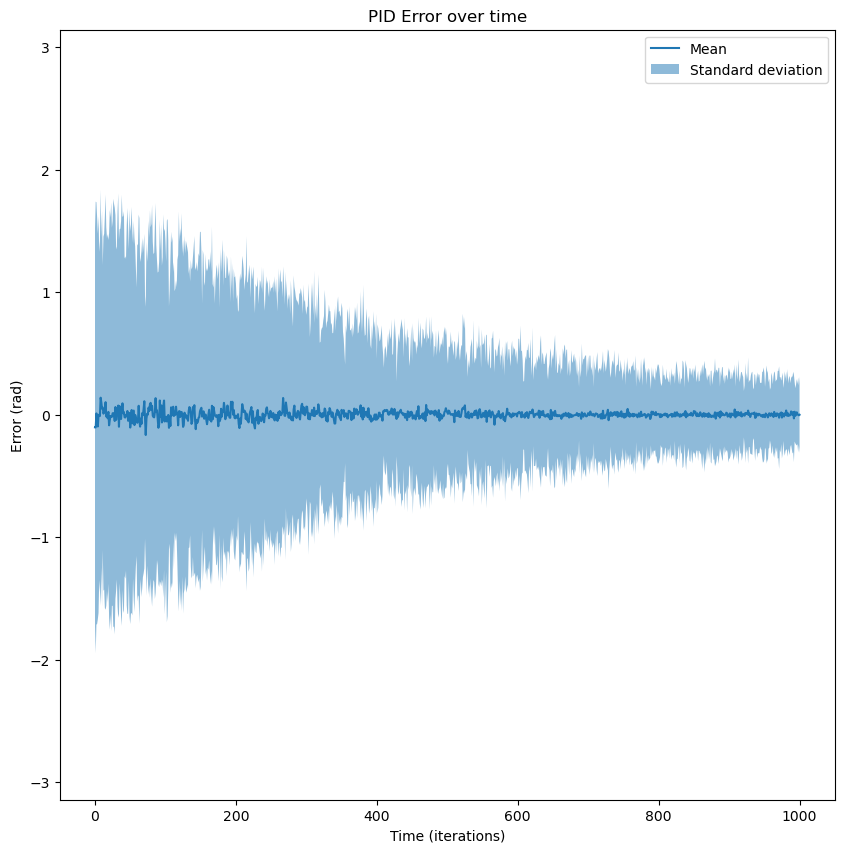

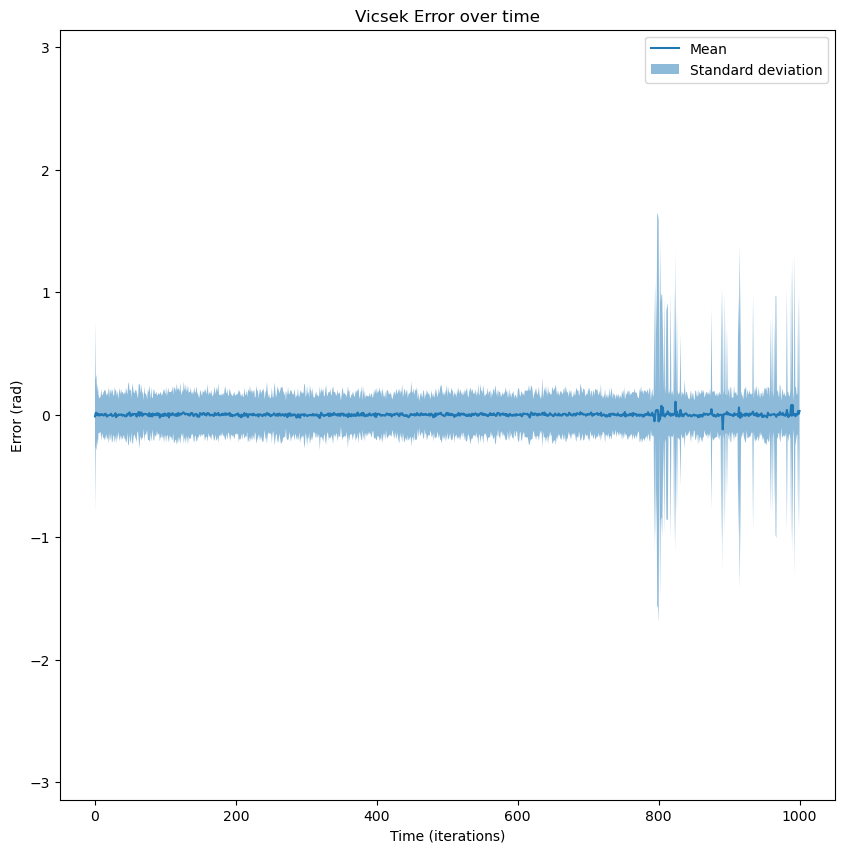

In [23]:
dfErrorPID = utils.getError(dfPID, radius)
dfErrorVicsek = utils.getError(dfVicsek, radius)

fig, ax = visualisation.plot_error_over_time(dfPID, radius=radius)
ax.set_title('PID Error over time')
plt.show()

fig, ax = visualisation.plot_error_over_time(dfVicsek, radius=radius)
ax.set_title('Vicsek Error over time')
plt.show()


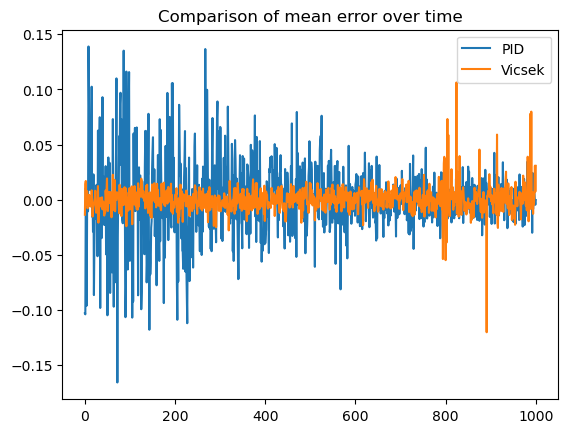

In [24]:
# mean error over time
meanErrorPID = dfErrorPID.mean(axis=1)
meanErrorVicsek = dfErrorVicsek.mean(axis=1)

plt.plot(meanErrorPID, label="PID")
plt.plot(meanErrorVicsek, label="Vicsek")
plt.legend()
plt.title('Comparison of mean error over time')
plt.show()